# Introduction 

This notebook will look into the stock prices & financials of the top five technology companies according to their market capitalizations. The respective companies are the following as of February 12, 2020:

1. Apple Inc - \\$1.423T
2. Microsoft - \\$1.375T
3. Amazon - \\$1.084T
4. Alphabet Inc/Google - \\$1.044T
5. Facebook - \\$584.2B

*Disclaimer: As stocks often fluctuate, the information here may be inaccurate/out-of-date/subject to change (as evident by the current situation involving COVID-19). Please don't make any investment decisions based on what's shown here. This project was purely to learn about how to read the major financial statements.*

In [1]:
import os
import requests
import json
import pandas as pd
import numpy as np
import plotly
import cufflinks as cf
cf.go_offline()

stocks_list = 'https://financialmodelingprep.com/api/v3/company/stock/list'
prices_url = 'https://financialmodelingprep.com/api/v3/historical-price-full/'
financials_url = 'https://financialmodelingprep.com/api/v3/financials/'

# !curl https://financialmodelingprep.com/api/v3/financials/income-statement/AAPL?period=quarter

def fetch_stock_list(ticker):
    request = requests.get(url = prices_url + ticker + '?timeseries=756') 
    data = request.json()
    
    result = pd.DataFrame(data['historical'])
    result = result[::-1]
    result.set_index('date', inplace=True)
    
    return result

# bs - balance sheet, is - income statement, cfs - cash flow statement 
def fetch_financials(ticker, kind):
    request_url =  financials_url
    if(kind == 'bs'):
        request_url += 'balance-sheet-statement/' + ticker + '?period=quarter'
    elif(kind == 'is'):
        request_url += 'income-statement/' + ticker + '?period=quarter'
    elif(kind == 'cfs'):
        request_url += 'cash-flow-statement/' + ticker + '?period=quarter'
        
    request = requests.get(url = request_url) 
    data = request.json()
    
    result = pd.DataFrame(data['financials'])
    result = result[::-1]
    result.set_index('date', inplace=True)
    
    return result[-12:]

## Stock Prices

In [2]:
facebook_prices = fetch_stock_list('FB')
facebook_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-04-25,145.79,147.15,145.79,146.49,146.49,17767500.0,17767500.0,0.70,0.480,146.47667,"April 25, 17",0.00480
2017-04-26,147.09,147.59,146.09,146.56,146.56,12395000.0,12395000.0,-0.53,-0.360,146.74667,"April 26, 17",-0.00360
2017-04-27,146.67,147.75,146.14,147.70,147.70,11275100.0,11275100.0,1.03,0.702,147.19667,"April 27, 17",0.00702
2017-04-28,149.50,151.53,149.07,150.25,150.25,30652200.0,30652200.0,0.75,0.502,150.28333,"April 28, 17",0.00502
2017-05-01,151.74,152.57,151.42,152.46,152.46,25218300.0,25218300.0,0.72,0.474,152.15000,"May 01, 17",0.00474


In [3]:
facebook_prices.iplot(kind='candlestick', title = 'Facebook Stock Price (3 Years)', 
                            xTitle = 'Date')

In [4]:
google_prices = fetch_stock_list('GOOG')
google_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-04-25,865.00,875.00,862.81,872.30,872.30,1672000.0,1672000.0,7.30,0.844,870.03667,"April 25, 17",0.00844
2017-04-26,874.23,876.05,867.75,871.73,871.73,1237200.0,1237200.0,-2.50,-0.286,871.84333,"April 26, 17",-0.00286
2017-04-27,873.60,875.40,870.38,874.25,874.25,2026800.0,2026800.0,0.65,0.074,873.34333,"April 27, 17",0.00074
2017-04-28,910.66,916.85,905.77,905.96,905.96,3276300.0,3276300.0,-4.70,-0.516,909.52667,"April 28, 17",-0.00516
2017-05-01,901.94,915.68,901.45,912.57,912.57,2116000.0,2116000.0,10.63,1.179,909.90000,"May 01, 17",0.01179


In [5]:
google_prices.iplot(kind='candlestick', title = 'Google Stock Price (3 Years)', 
                            xTitle = 'Date')

In [6]:
amazon_prices = fetch_stock_list('AMZN')
amazon_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-04-25,907.04,909.48,903.00,907.62,907.62,3380600.0,3380600.0,0.58,0.064,906.70000,"April 25, 17",0.00064
2017-04-26,910.30,915.75,907.56,909.29,909.29,2608900.0,2608900.0,-1.01,-0.111,910.86667,"April 26, 17",-0.00111
2017-04-27,914.39,921.86,912.11,918.38,918.38,5305500.0,5305500.0,3.99,0.436,917.45000,"April 27, 17",0.00436
2017-04-28,948.83,949.59,924.33,924.99,924.99,7364700.0,7364700.0,-23.84,-2.513,932.97000,"April 28, 17",-0.02513
2017-05-01,927.80,954.40,927.80,948.23,948.23,5466500.0,5466500.0,20.43,2.202,943.47667,"May 01, 17",0.02202


In [7]:
amazon_prices.iplot(kind='candlestick', title = 'Amazon Stock Price (3 Years)', 
                            xTitle = 'Date')

In [8]:
microsoft_prices = fetch_stock_list('MSFT')
microsoft_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-04-25,67.90,68.04,67.60,67.92,64.96,30242700.0,30242700.0,0.02,0.029,67.85333,"April 25, 17",0.00029
2017-04-26,68.08,68.31,67.62,67.83,64.88,26190800.0,26190800.0,-0.25,-0.367,67.92000,"April 26, 17",-0.00367
2017-04-27,68.15,68.38,67.58,68.27,65.30,34971000.0,34971000.0,0.12,0.176,68.07667,"April 27, 17",0.00176
2017-04-28,68.91,69.14,67.69,68.46,65.48,39548800.0,39548800.0,-0.45,-0.653,68.43000,"April 28, 17",-0.00653
2017-05-01,68.68,69.55,68.50,69.41,66.39,31954400.0,31954400.0,0.73,1.063,69.15333,"May 01, 17",0.01063


In [9]:
microsoft_prices.iplot(kind='candlestick', title = 'Microsoft Stock Price (3 Years)', 
                            xTitle = 'Date')

In [10]:
apple_prices = fetch_stock_list('AAPL')
apple_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-04-25,143.91,144.90,143.87,144.53,139.08,18871500.0,18871500.0,0.62,0.431,144.43333,"April 25, 17",0.00431
2017-04-26,144.47,144.60,143.38,143.68,138.26,20041200.0,20041200.0,-0.79,-0.547,143.88667,"April 26, 17",-0.00547
2017-04-27,143.92,144.16,143.31,143.79,138.37,14246300.0,14246300.0,-0.13,-0.090,143.75333,"April 27, 17",-0.00090
2017-04-28,144.09,144.30,143.27,143.65,138.23,20860400.0,20860400.0,-0.44,-0.305,143.74000,"April 28, 17",-0.00305
2017-05-01,145.10,147.20,144.96,146.58,141.05,33602900.0,33602900.0,1.48,1.020,146.24667,"May 01, 17",0.01020


In [11]:
apple_prices.iplot(kind='candlestick', title = 'Apple Stock Price (3 Years)', 
                            xTitle = 'Date')

## Financials

The true value of a company's stock can't (and shouldn't) be determined by looking at price graphs and judging them based on spikes or dips. For instance, assume a Company X initially has a stock price of \\$100. A few months later this rises to \\$500. First impressions may indicate that it's hot and the company is doing well, but how do we know this isn't temporary? Is the price artificially inflated? Is the company losing money? Is it growing? Does it have insurmountable debt? Looking at a company's financial statements can help to answer some of these questions and decide whether it's smart to invest in a company. 

The three major financial statements that are used to assess the "health" of a company are: the balance sheet, the income statement, and the cash flow statement. The following sections will look at certain metrics within each of these statements and compare values among our five companies. 

### Balance Sheet

One of the fundamental equations of accounting is as follows: Equity = Assets - Liabilities. Or simply put, your worth is equal to how much you have minus how much you owe. 

Assets can be explained simply as something you have that can be turned into money. This can include actual cash, a car, a house, money someone owes you, the good in your store (if you own a business), and more. These can be further divided into current assets --- those that can be turned into cash within a year, and non-current or long-term assets --- those that would take more than a year to liquidate. Liabilities, in the context of finance, can be defined as how much money you owe to someone else, an entity, etc. Examples of liabilities include bills, a mortgage, loan payments/interest, etc. They can also be segmented into current/non-current liabilities similar to assets. Equity, then is a true measure of how much you're worth after subtracting away all monetary obligations.

***Note*** : The API used in this project has not been updated to include Google's Q4 2019 results, so those values will be entered manually for the balance sheet & other financial statements where needed.

In [12]:
import plotly.graph_objects as go

fb_balancesheet = fetch_financials('fb', 'bs')
goog_balancesheet = fetch_financials('goog', 'bs')
amzn_balancesheet = fetch_financials('amzn', 'bs')
msft_balancesheet = fetch_financials('msft', 'bs')
aapl_balancesheet = fetch_financials('aapl', 'bs')

fb_balancesheet['Working Capital'] = fb_balancesheet['Total current assets'].astype(float) - fb_balancesheet['Total current liabilities'].astype(float)
goog_balancesheet['Working Capital'] = goog_balancesheet['Total current assets'].astype(float) - goog_balancesheet['Total current liabilities'].astype(float)
amzn_balancesheet['Working Capital'] = amzn_balancesheet['Total current assets'].astype(float) - amzn_balancesheet['Total current liabilities'].astype(float)
msft_balancesheet['Working Capital'] = msft_balancesheet['Total current assets'].astype(float) - msft_balancesheet['Total current liabilities'].astype(float)
aapl_balancesheet['Working Capital'] = aapl_balancesheet['Total current assets'].astype(float) - aapl_balancesheet['Total current liabilities'].astype(float)

print(fb_balancesheet.columns)

Index(['Cash and cash equivalents', 'Short-term investments',
       'Cash and short-term investments', 'Receivables', 'Inventories',
       'Total current assets', 'Property, Plant & Equipment Net',
       'Goodwill and Intangible Assets', 'Long-term investments', 'Tax assets',
       'Total non-current assets', 'Total assets', 'Payables',
       'Short-term debt', 'Total current liabilities', 'Long-term debt',
       'Total debt', 'Deferred revenue', 'Tax Liabilities',
       'Deposit Liabilities', 'Total non-current liabilities',
       'Total liabilities', 'Other comprehensive income',
       'Retained earnings (deficit)', 'Total shareholders equity',
       'Investments', 'Net Debt', 'Other Assets', 'Other Liabilities',
       'Working Capital'],
      dtype='object')


Below will show this in graph form for the 5 companies selected as of the latest financial quarter (Q4 2019).



In [57]:
companies = ['Apple', 'Microsoft', 'Amazon', 'Google', 'Facebook']

fig = go.Figure(data=[
    go.Bar(name='Assets', x=companies, y=[aapl_balancesheet["Total assets"][-1], msft_balancesheet["Total assets"][-1], 
                                          amzn_balancesheet["Total assets"][-1], goog_balancesheet["Total assets"][-1], 
                                          fb_balancesheet["Total assets"][-1]]),
    go.Bar(name='Liabilities', x=companies, y=[aapl_balancesheet["Total liabilities"][-1], msft_balancesheet["Total liabilities"][-1], 
                                               amzn_balancesheet["Total liabilities"][-1], goog_balancesheet["Total liabilities"][-1], 
                                               fb_balancesheet["Total liabilities"][-1]]),
    go.Bar(name='Equity', x=companies, y=[aapl_balancesheet["Total shareholders equity"][-1], msft_balancesheet["Total shareholders equity"][-1], 
                                          amzn_balancesheet["Total shareholders equity"][-1], goog_balancesheet["Total shareholders equity"][-1], 
                                          fb_balancesheet["Total shareholders equity"][-1]])
])
fig.update_layout(title='Balance Sheets Q4 2019', barmode='stack')
fig.show()

From here, you can see that even though Apple is the "biggest" company according to their market cap, they come in 4th here with regards to actual net worth (~89.5 billion). This can be attributed to their massive liabilities of just over 251 billion. Google comes in first with an equity of 201.4 billion despite a slightly smaller shareholder equity ratio than that of Facebook --- 0.73 to 0.75, respectively. 

In [58]:
quarters_12 = ['Q1 2017', 'Q2 2017', 'Q3 2017','Q4 2017','Q1 2018','Q2 2018','Q3 2018','Q4 2018',
            'Q1 2019', 'Q2 2019', 'Q3 2019', 'Q4 2019']

fig = go.Figure(data=[
    go.Bar(name='$FB', x=quarters_12, y=fb_balancesheet["Working Capital"].values),
    go.Bar(name='$GOOG', x=quarters_12, y=goog_balancesheet["Working Capital"].values), 
    go.Bar(name='$AMZN', x=quarters_12, y=amzn_balancesheet["Working Capital"].values),
    go.Bar(name='$MSFT', x=quarters_12, y=msft_balancesheet["Working Capital"].values),
    go.Bar(name='$AAPL', x=quarters_12, y=aapl_balancesheet["Working Capital"].values)
])

fig.update_layout(barmode='group', width=1500)
fig.show()

Working capital is one of the metrics that can be obtained from a balance sheet by calculating current assets minus current liabilities. It is a measure of how well a business can pay its debts within the current year and fund daily operations or invest in future growth. A consistent low or negative value could mean that the company may not be able to either grow, fulfill it's financial obligations, or go bankrupt in the future. On the other hand, too much working capital could indicate an inefficient use of resources. 

Keep in mind that working capital only gives a short-term financial picture and may not address how well a business might fare beyond a year.

### Income Statement 

Another important accounting equation is the following: Income = Sales - Costs/Expenses. This is self-explanatory in that the amount a business makes is its sales minus expenses. The income statement looks at this relationship in detail through various metrics. The costs in this case can range from salaries to pay, mortgage/lease payments, interest on loans, cost of supplies/raw material, taxes, etc. Ultimately, the income statement of a business can give an indication of its profitability. 

In [15]:
fb_incstatement = fetch_financials('fb', 'is')
goog_incstatement = fetch_financials('goog', 'is')
amzn_incstatement = fetch_financials('amzn', 'is')
msft_incstatement = fetch_financials('msft', 'is')
aapl_incstatement = fetch_financials('aapl', 'is')

print(fb_incstatement.columns)

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       'Income Tax Expense', 'Net Income - Non-Controlling int',
       'Net Income - Discontinued ops', 'Net Income', 'Preferred Dividends',
       'Net Income Com', 'EPS', 'EPS Diluted', 'Weighted Average Shs Out',
       'Weighted Average Shs Out (Dil)', 'Dividend per Share', 'Gross Margin',
       'EBITDA Margin', 'EBIT Margin', 'Profit Margin',
       'Free Cash Flow margin', 'EBITDA', 'EBIT', 'Consolidated Income',
       'Earnings Before Tax Margin', 'Net Profit Margin'],
      dtype='object')


In [59]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=5, cols=1, 
                    subplot_titles=("Apple Revenue", "Microsoft Revenue", "Amazon Revenue", 
                                    "Google Revenue", "Facebook Revenue"))
fig.add_trace(go.Scatter(name='$AAPL', x=quarters_12, y=aapl_incstatement["Revenue"].values),
                 row=1, col=1)
fig.add_trace(go.Scatter(name='$MSFT', x=quarters_12, y=msft_incstatement["Revenue"].values),
                 row=2, col=1)
fig.add_trace(go.Scatter(name='$AMZN', x=quarters_12, y=amzn_incstatement["Revenue"].values),
                 row=3, col=1)
fig.add_trace(go.Scatter(name='$GOOG', x=quarters_12, y=goog_incstatement["Revenue"].values),
                 row=4, col=1)
fig.add_trace(go.Scatter(name='$FB', x=quarters_12, y=fb_incstatement["Revenue"].values),
                 row=5, col=1)

fig.update_layout(height=1600)
fig.show()

Revenue, or sales, is the money made once customers actually receive products, services, or goods from a company. Keep in mind, this only includes money generated from normal business operations. 

Looking at the revenues of our 5 companies, there's a general positive trend over the past 3 years. Every one of them shows spikes during Q4, which makes sense due to the holiday season when people tend to purchase more things. Apple generated the most revenue during the most recent quarter ($91B in Q4 2019) and has the greatest spikes during the holiday quarter. This can most likely be attributed to the fact that new iPhones, Apple Watches, and the occasional Mac product come out in September/October. 

In [17]:
print(fb_incstatement.columns)

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       'Income Tax Expense', 'Net Income - Non-Controlling int',
       'Net Income - Discontinued ops', 'Net Income', 'Preferred Dividends',
       'Net Income Com', 'EPS', 'EPS Diluted', 'Weighted Average Shs Out',
       'Weighted Average Shs Out (Dil)', 'Dividend per Share', 'Gross Margin',
       'EBITDA Margin', 'EBIT Margin', 'Profit Margin',
       'Free Cash Flow margin', 'EBITDA', 'EBIT', 'Consolidated Income',
       'Earnings Before Tax Margin', 'Net Profit Margin'],
      dtype='object')


In [60]:
fig = make_subplots(rows=2, cols=3, 
                    subplot_titles=("Apple Expenses", "Microsoft Expenses", "Amazon Expenses", 
                                    "Google Expenses", "Facebook Expenses"), 
                    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}], 
                           [{"type": "domain"}, {"type": "domain"}, {}]])

fig.add_trace(go.Pie(name='$AAPL', labels=['R&D', 'SG&A'], values=[str(aapl_incstatement['R&D Expenses'][-1]), 
                                                                   str(aapl_incstatement['SG&A Expense'][-1])]),
                 row=1, col=1)
fig.add_trace(go.Pie(name='$MSFT', labels=['R&D', 'SG&A'], values=[float(msft_incstatement['R&D Expenses'][-1]), 
                                                                   float(msft_incstatement['SG&A Expense'][-1])]),
                 row=1, col=2)
fig.add_trace(go.Pie(name='$AMZN', labels=['R&D', 'SG&A'], values=[float(amzn_incstatement['R&D Expenses'][-1]), 
                                                                   float(amzn_incstatement['SG&A Expense'][-1])]),
                 row=1, col=3)
fig.add_trace(go.Pie(name='$GOOG', labels=['R&D', 'SG&A'], values=[float(goog_incstatement['R&D Expenses'][-1]), 
                                                                   float(goog_incstatement['SG&A Expense'][-1])]), 
                 row=2, col=1)
fig.add_trace(go.Pie(name='$FB', labels=['R&D', 'SG&A'], values=[float(fb_incstatement['R&D Expenses'][-1]), 
                                                                 float(fb_incstatement['SG&A Expense'][-1])]),
                 row=2, col=2)

fig.show()

Notice how Amazon spends by FAR the most on Research & Development while Microsoft spends the most on Sales/General/Administrative Expenses (but not by much). 

In [63]:
fig = go.Figure(data=[
    go.Scatter(name='$AAPL', x=quarters_12, y=aapl_incstatement['Net Profit Margin'].values, mode='lines'), 
    go.Scatter(name='$MSFT', x=quarters_12, y=msft_incstatement['Net Profit Margin'].values, mode='lines'),
    go.Scatter(name='$AMZN', x=quarters_12, y=amzn_incstatement['Net Profit Margin'].values, mode='lines'),
    go.Scatter(name='$FB', x=quarters_12, y=fb_incstatement['Net Profit Margin'].values, mode='lines'), 
    go.Scatter(name='$GOOG', x=quarters_12, y=goog_incstatement['Net Profit Margin'].values, mode='lines')
])

fig.update_layout(title= 'Net Profit Margins')
fig.show()

Looks like Microsoft & Google had a pretty bad quarter in Q4 of 2017 and actually lost money. Also notice how Amazon & Google operate on thin margins compared to the others due to huge expenses relative to their income.

***Note*** : both companies might not be to visible on the graph at the same time since they have similar numbers, but each can be filtered out

### Cash Flow Statement 

A cash flow statement measures the money that flows in & out of a company during a particular period. The net cash at the end of a period is calculated by adding the net cash from operations, investing, and financing together with the balance at the start. Cash from operations is the cash gained or lost from day-to-day activities. Cash from investments includes cash from buying/selling PP&E, stocks, securities, etc. Cash from finances refers to cash from activities that involve company equity (issuing more shares, paying dividends, selling bonds). 

Why is this statement important? Well, cash is something that's readily usable. It can be used to purchase new buildings, hire more people, buy new equipment, fund new product development, and much more. Cash can be used to either grow a business or pay its bills. The balance sheet & income statement simply don't give an entire financial picture. A company might have lots of inventory or accounts receivable (money owed to them), but how quickly do they receive the cash for it? Keep in mind that a negative cash flow, as long as it's not consistent, isn't necessarily a a bad thing. Assuming a business makes a big purchase on a factory or fancy new equipment, cash might not be readily available, but the investment made could pay off with big returns in the future. 

In [20]:
fb_cfstatement = fetch_financials('fb', 'cfs')
goog_cfstatement = fetch_financials('goog', 'cfs')
amzn_cfstatement = fetch_financials('amzn', 'cfs')
msft_cfstatement = fetch_financials('msft', 'cfs')
aapl_cfstatement = fetch_financials('aapl', 'cfs')

print(fb_cfstatement.columns)

Index(['Depreciation & Amortization', 'Stock-based compensation',
       'Operating Cash Flow', 'Capital Expenditure',
       'Acquisitions and disposals', 'Investment purchases and sales',
       'Investing Cash flow', 'Issuance (repayment) of debt',
       'Issuance (buybacks) of shares', 'Dividend payments',
       'Financing Cash Flow', 'Effect of forex changes on cash',
       'Net cash flow / Change in cash', 'Free Cash Flow',
       'Net Cash/Marketcap'],
      dtype='object')


In [21]:
fig = make_subplots(rows=1, cols=5, 
                    subplot_titles=("Apple FCF", "Microsoft FCF", "Amazon FCF", 
                                    "Google FCF", "Facebook FCF"))
fig.add_trace(go.Bar(name='$AAPL', x=quarters_12, y=aapl_cfstatement['Free Cash Flow'].values),
                 row=1, col=1)
fig.add_trace(go.Bar(name='$MSFT', x=quarters_12, y=msft_cfstatement['Free Cash Flow'].values),
                 row=1, col=2)
fig.add_trace(go.Bar(name='$AMZN', x=quarters_12, y=amzn_cfstatement['Free Cash Flow'].values),
                 row=1, col=3)
fig.add_trace(go.Bar(name='$GOOG', x=quarters_12, y=goog_cfstatement['Free Cash Flow'].values),
                 row=1, col=4)
fig.add_trace(go.Bar(name='$FB', x=quarters_12, y=fb_cfstatement['Free Cash Flow'].values),
                 row=1, col=5)

fig.update_layout(width=2000)
fig.show()

Free Cash Flow (FCF) is a useful metric to observe when going through the cash flow statement. It is the amount of cash left over from the operations of a business after subtracting capital expenditures. As briefly mentioned before,  the net cash flow from operations would refer to the actual cash that changes hands when performing day-to-day activities. These activities would include paying employees, collecting accounts receivables, selling things, paying taxes, etc. Capital expenditures are the funds used to purchase long-term/fixed assets that (hopefully) improve a business. Land, equipment, furniture, computers, cars/trucks, and more fall in this category. 

Among the 5 companies examined here, Apple & Microsoft seem opposite in that Apple has their highest FCF during the holiday season/Q4 whereas Microsoft has their lowest during those quarters. Amazon has had their highest FCF during Q4 of the fiscal year, however during the rest of the year, the figures are substantially less, with some quarters even going negative. 

In [22]:
fig = make_subplots(rows=5, cols=1, 
                    subplot_titles=("Apple Stock Buybacks - Last 3 Years", "Microsoft Stock Buybacks - Last 3 Years", 
                                    "Amazon Stock Buybacks - Last 3 Years", "Google Stock Buybacks - Last 3 Years", 
                                    "Facebook Stock Buybacks - Last 3 Years"))

fig.add_trace(go.Bar(name='$AAPL', x=quarters_12, y=aapl_cfstatement['Issuance (buybacks) of shares'].values),
                 row=1, col=1)
fig.add_trace(go.Bar(name='$MSFT', x=quarters_12, y=msft_cfstatement['Issuance (buybacks) of shares'].values),
                 row=2, col=1)
fig.add_trace(go.Bar(name='$AMZN', x=quarters_12, y=amzn_cfstatement['Issuance (buybacks) of shares'].values),
                 row=3, col=1)
fig.add_trace(go.Bar(name='$GOOG', x=quarters_12, y=goog_cfstatement['Issuance (buybacks) of shares'].values),
                 row=4, col=1)
fig.add_trace(go.Bar(name='$FB', x=quarters_12, y=fb_cfstatement['Issuance (buybacks) of shares'].values),
                 row=5, col=1)

fig.update_yaxes(title_text="Money Spent ($)", row=1, col=1)
fig.update_yaxes(title_text="Money Spent ($)", row=2, col=1)
fig.update_yaxes(title_text="Money Spent ($)", row=3, col=1)
fig.update_yaxes(title_text="Money Spent ($)", row=4, col=1)
fig.update_yaxes(title_text="Money Spent ($)", row=5, col=1)

fig.update_layout(height=1500)
fig.show()

From the graphs above, it appears that Apple seems to consistently buy back their stock more than the other companies do. 

In [23]:
amzn_cfstatement.tail()

,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap
date,,,,,,,,,,,,,,,
2018-12-31,4262000000.0,1417000000.0,16477000000.0,3734000000.0,-331000000.0,-121000000.0,-3572000000.0,-135000000.0,-11325000000.0,0.0,-1761000000.0,-3000000.0,11141000000.0,12743000000.0,0.0
2019-03-31,4854000000.0,1274000000.0,1846000000.0,3290000000.0,-1169000000.0,-4233000000.0,-8123000000.0,-351000000.0,-23115000000.0,-0.0,-2377000000.0,-12000000.0,-8666000000.0,-1444000000.0,0.0
2019-06-30,5202000000.0,1971000000.0,9117000000.0,3562000000.0,-116000000.0,-4790000000.0,-7549000000.0,-113000000.0,499000000.0,0.0,-2158000000.0,48000000.0,-542000000.0,5555000000.0,0.0
2019-09-30,5563000000.0,1779000000.0,7892000000.0,4697000000.0,-399000000.0,-1289000000.0,-5073000000.0,-355000000.0,-639000000.0,0.0,-1960000000.0,-270000000.0,589000000.0,3195000000.0,0.0
2019-12-31,6170000000.0,1840000000.0,19659000000.0,5312000000.0,-777000000.0,1181000000.0,-3536000000.0,-1865000000.0,-12837000000.0,0.0,-3571000000.0,304000000.0,12856000000.0,14347000000.0,0.0


## Forecasting

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
import fbprophet
import statsmodels.api as sm
import matplotlib.pyplot as plt

apple_prices['vwap'].describe()

count    756.000000
mean     198.644996
std       43.891767
min      142.880000
25%      167.624998
50%      187.543335
75%      219.032500
max      325.296670
Name: vwap, dtype: float64

In [25]:
apple_prices['vwap'].iplot(kind='line', title = 'Apple Stock Price (3 Years)', 
                            xTitle = 'Date')

In [26]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(prices):
    dft_result = adfuller(prices)
    print("ADF: ", dft_result[0])
    print("p value: ", dft_result[1])
    print("lags: ", dft_result[2])
    print("num obvs: ", dft_result[3])
    
dickey_fuller(apple_prices['vwap'])

ADF:  -0.9424191554104159
p value:  0.7736825313726192
lags:  12
num obvs:  743


In [27]:
apple_prices['weekshifted'] = apple_prices['vwap'] - apple_prices['vwap'].shift(7)
apple_prices['weekshifted']

date
2017-04-25         NaN
2017-04-26         NaN
2017-04-27         NaN
2017-04-28         NaN
2017-05-01         NaN
                ...   
2020-04-20    13.59667
2020-04-21     2.76333
2020-04-22     4.47333
2020-04-23    -7.23333
2020-04-24    -2.80334
Name: weekshifted, Length: 756, dtype: float64

In [28]:
dickey_fuller(apple_prices['weekshifted'].dropna())

ADF:  -6.060002539354351
p value:  1.2190244137878002e-07
lags:  19
num obvs:  729


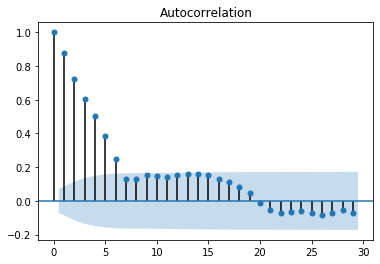

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(apple_prices['weekshifted'][7:])
plt.show()

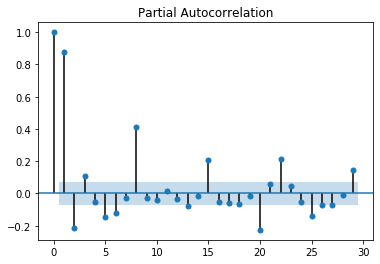

In [30]:
plot_pacf(apple_prices['weekshifted'][7:])
plt.show()

In [31]:
from statsmodels.tsa.arima_model import ARIMA

apple_prices['datetime'] = apple_prices.index
# apple_prices.index = pd.DatetimeIndex(apple_prices.index).to_period('D')

arima_model = ARIMA(apple_prices['weekshifted'][7:], order=(1,1,1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.weekshifted   No. Observations:                  748
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2225.592
Method:                       css-mle   S.D. of innovations              4.742
Date:                Sat, 25 Apr 2020   AIC                           4459.184
Time:                        14:30:25   BIC                           4477.653
Sample:                             1   HQIC                          4466.301
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0042      0.198     -0.021      0.983      -0.393       0.384
ar.L1.D.weekshifted    -0.2540      0.105     -2.424      0.015      -0.459      -0.049
ma.L1.D.weekshifted     0.4334      0.094      4.610      0.000       0.249       0.618
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.9370           +0.0000j            3.9370            0.5000
MA.1           -2.3075           +0.0000j            2.3075            0.5000
-----------------------------------------------------------------------------
"""

In [64]:
apple_prices['forecast'] = arima_model_fit.predict(start=10, end=700, dynamic=True)

fig = go.Figure(data=[
    go.Scatter(name='original', x=apple_prices['datetime'], y=apple_prices['weekshifted'].values, mode='lines'), 
    go.Scatter(name='forecast', x=apple_prices['datetime'], y=apple_prices['forecast'].values, mode='lines')
])

fig.update_layout(title= 'Apple ARIMA Forecast')
fig.show()

In [33]:
sarima_model=sm.tsa.statespace.SARIMAX(apple_prices['vwap'],order=(1, 1, 1),seasonal_order=(1,1,1,7))
sarima_model_fit=sarima_model.fit()
sarima_model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              vwap   No. Observations:                  756
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2032.632
Date:                           Sat, 25 Apr 2020   AIC                           4075.264
Time:                                   14:30:27   BIC                           4098.351
Sample:                                        0   HQIC                          4084.161
                                           - 756                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8362      0.047    -17.652      0.000      -0.929      -0.743
ma.L1          0.8928      0.038     23.296      0.000       0.818       0.968
ar.S.L7        0.0917      0.022      4.116      0.000       0.048       0.135
ma.S.L7       -0.9702      0.012    -78.712      0.000      -0.994      -0.946
sigma2        13.0963      0.313     41.892      0.000      12.484      13.709
===================================================================================
Ljung-Box (Q):                       79.13   Jarque-Bera (JB):              2235.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.40   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
apple_prices['forecast'] = sarima_model_fit.predict(start=650, end=750, dynamic=True)

fig = go.Figure(data=[
    go.Scatter(name='original', x=apple_prices['datetime'], y=apple_prices['vwap'].values, mode='lines'), 
    go.Scatter(name='forecast', x=apple_prices['datetime'], y=apple_prices['forecast'].values, mode='lines')
])

fig.update_layout(title= 'Apple SARIMA Forecast')
fig.show()

In [46]:
import fbprophet

prdf = apple_prices[['datetime', 'vwap']]
prdf.reset_index()
prdf.columns = ['ds', 'y']
fbp = fbprophet.Prophet()
fbp.fit(prdf)

future = fbp.make_future_dataframe(periods=90)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
841,2020-07-19
842,2020-07-20
843,2020-07-21
844,2020-07-22
845,2020-07-23


In [47]:
forecast = fbp.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
841,2020-07-19,302.120624,251.138394,296.551798,285.977817,321.972029,-29.377313,-29.377313,-29.377313,-8.720151,-8.720151,-8.720151,-20.657163,-20.657163,-20.657163,0.0,0.0,0.0,272.743310
842,2020-07-20,302.350553,262.372853,308.557753,286.070012,322.690535,-17.637581,-17.637581,-17.637581,2.826077,2.826077,2.826077,-20.463657,-20.463657,-20.463657,0.0,0.0,0.0,284.712972
843,2020-07-21,302.580482,263.287592,310.686883,286.124167,323.488782,-16.658926,-16.658926,-16.658926,3.619512,3.619512,3.619512,-20.278438,-20.278438,-20.278438,0.0,0.0,0.0,285.921557
844,2020-07-22,302.810412,265.661352,309.396192,286.059125,324.183333,-16.262447,-16.262447,-16.262447,3.842051,3.842051,3.842051,-20.104498,-20.104498,-20.104498,0.0,0.0,0.0,286.547964
845,2020-07-23,303.040341,265.402641,312.193361,286.028643,324.829654,-16.198228,-16.198228,-16.198228,3.746053,3.746053,3.746053,-19.944281,-19.944281,-19.944281,0.0,0.0,0.0,286.842113


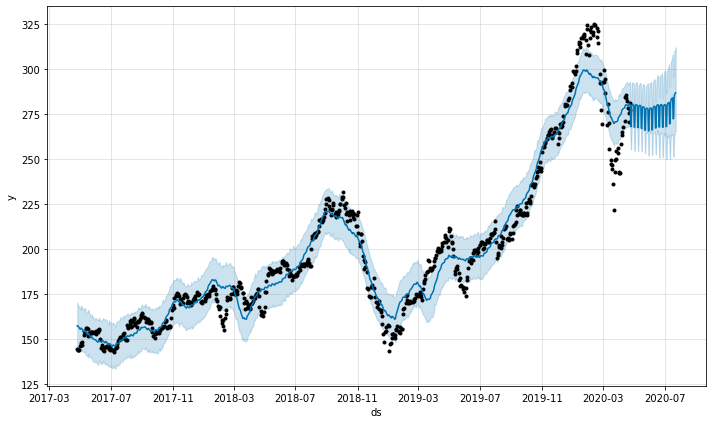

In [51]:
fbp.plot(forecast);

## References

1. https://financialmodelingprep.com/developer/docs/#Company-Financial-Statements